# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [2]:
# Importando Pacotes.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import graphviz
import os

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Lendo CSV de X_test.

X_test = pd.read_csv("./output/X_test.csv", index_col=['indice', 'indv'])
X_test

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
indice,indv,,,,,,,,,,,,,,,,,,,,,
0,1,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,1,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,1,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,16,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,16,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,16,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184


In [4]:
# Lendo CSV de y_test.

y_test = pd.read_csv("./output/y_test.csv", index_col=0)
y_test

,Atividade
0,5_STANDING
1,5_STANDING
2,5_STANDING
3,5_STANDING
4,5_STANDING
...,...
2942,2_WALKING_UPSTAIRS
2943,2_WALKING_UPSTAIRS
2944,2_WALKING_UPSTAIRS
2945,2_WALKING_UPSTAIRS


In [5]:
# Lendo CSV de X_.

X_ = pd.read_csv("./input/X_.csv", index_col=['indice', 'indv'])
X_

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
indice,indv,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,30,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,30,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811


In [6]:
# Lendo CSV de y_.

y_ = pd.read_csv("./input/y_.csv", index_col=0)
y_

,Atividade
0,5_STANDING
1,5_STANDING
2,5_STANDING
3,5_STANDING
4,5_STANDING
...,...
7347,2_WALKING_UPSTAIRS
7348,2_WALKING_UPSTAIRS
7349,2_WALKING_UPSTAIRS
7350,2_WALKING_UPSTAIRS


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [7]:
# Divisão dos dados em Treino e Validação usando train_test_split().

X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=.40, random_state=1729)

In [8]:
# Confirmação da Separação dos dados. Treino: 40%; Validação: 30%; Teste: 30%.

print(f"X_train(%): {X_train.shape[0]/ (X_train.shape[0] + X_valid.shape[0] + X_test.shape[0]):.2f}")
print(f"X_valid(%): {X_valid.shape[0]/ (X_train.shape[0] + X_valid.shape[0] + X_test.shape[0]):.2f}")
print(f"X_test (%): {X_test.shape[0]/ (X_train.shape[0] + X_valid.shape[0] + X_test.shape[0]):.2f}")
print("-----------------")
print(f"y_train(%): {y_train.shape[0]/ (y_train.shape[0] + y_valid.shape[0] + y_test.shape[0]):.2f}")
print(f"y_valid(%): {y_valid.shape[0]/ (y_train.shape[0] + y_valid.shape[0] + y_test.shape[0]):.2f}")
print(f"y_test (%): {y_test.shape[0]/ (y_train.shape[0] + y_valid.shape[0] + y_test.shape[0]):.2f}")

X_train(%): 0.43
X_valid(%): 0.29
X_test (%): 0.29
-----------------
y_train(%): 0.43
y_valid(%): 0.29
y_test (%): 0.29


In [9]:
# Criação do diretório ./output/ e salvando os CSV's de X_train e X_valid.

os.makedirs("./output/",exist_ok=True)
X_train.to_csv("./output/X_train.csv")
X_valid.to_csv("./output/X_valid.csv")
y_train.to_csv("./output/y_train.csv")
y_valid.to_csv("./output/y_valid.csv")

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [10]:
# Rodando Árvore com profundidade máxima 4.

clf = DecisionTreeClassifier(max_depth=4, random_state=2360873).fit(X_train, y_train)

In [11]:
# Identificando as 3 variáveis com maior importância.

(pd.DataFrame(X_train.columns).rename({0: "Variável"},axis=1)
                              .assign(importances = clf.feature_importances_)
                              .sort_values(by='importances', ascending=False))[:3]

,Variável,importances
56,tGravityAcc-energy()-X,0.274563
360,fBodyAccJerk-energy()-X,0.252275
559,"angle(Y,gravityMean)",0.177500


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [12]:
# Armazenando apenas as 3 Variáveis de maior importância (X_train).

X_train = X_train[['tGravityAcc-energy()-X', 'fBodyAccJerk-energy()-X', 'angle(Y,gravityMean)']]
X_train

,,tGravityAcc-energy()-X,fBodyAccJerk-energy()-X,"angle(Y,gravityMean)"
indice,indv,,,
4550,22,0.876175,-0.999967,0.243597
1612,7,0.652747,-0.841980,0.287039
152,1,0.744109,-0.890945,0.311837
6957,29,0.808350,-0.631756,0.247893
5981,27,0.907463,-0.694106,0.191421
...,...,...,...,...
3605,19,0.837704,-0.997267,0.251008
5669,26,0.825980,-0.750573,0.252466
1267,6,0.760463,-0.298084,0.221396


In [13]:
# Armazenando apenas as 3 Variáveis de maior importância (X_test).

X_test = X_test[['tGravityAcc-energy()-X', 'fBodyAccJerk-energy()-X', 'angle(Y,gravityMean)']]
X_test

,,tGravityAcc-energy()-X,fBodyAccJerk-energy()-X,"angle(Y,gravityMean)"
indice,indv,,,
0,1,0.829297,-0.995036,0.276801
1,1,0.805575,-0.998371,0.281343
2,1,0.812044,-0.999899,0.280083
3,1,0.809379,-0.999895,0.284114
4,1,0.803500,-0.999914,0.290722
...,...,...,...,...
2942,16,0.712964,-0.827070,0.274627
2943,16,0.713748,-0.793557,0.273578
2944,16,0.712784,-0.810651,0.274479


In [14]:
# Armazenando apenas as 3 Variáveis de maior importância (X_valid).

X_valid = X_valid[['tGravityAcc-energy()-X', 'fBodyAccJerk-energy()-X', 'angle(Y,gravityMean)']]
X_valid

,,tGravityAcc-energy()-X,fBodyAccJerk-energy()-X,"angle(Y,gravityMean)"
indice,indv,,,
3099,16,0.743891,-0.999965,0.195996
4058,21,-0.862794,-0.999860,-0.392671
4850,23,0.788912,-0.256513,0.167329
7164,30,0.829959,-0.922146,0.253537
302,1,0.831002,-0.527667,0.267205
...,...,...,...,...
931,5,0.926331,-0.719385,0.180939
4454,22,-0.969606,-0.999783,-0.469026
6302,28,0.618930,-0.997363,0.004259


In [15]:
%%time
# Cálculo dos ccp_alphas e impurities.

caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

CPU times: total: 0 ns
Wall time: 30 ms


In [16]:
%%time
# Rodando uma árvore para cada ccp_alpha.

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

CPU times: total: 5.52 s
Wall time: 6.31 s


In [17]:
%%time
# Gráfico da acurácia em função do ccp_alpha (Treino e Validação).

train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# Melhor árvore de acordo com Acurácia x ccp_alpha.

ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 86.98


DecisionTreeClassifier(ccp_alpha=0.0002590925284192117, random_state=2360873)

Acurácia: 68.04


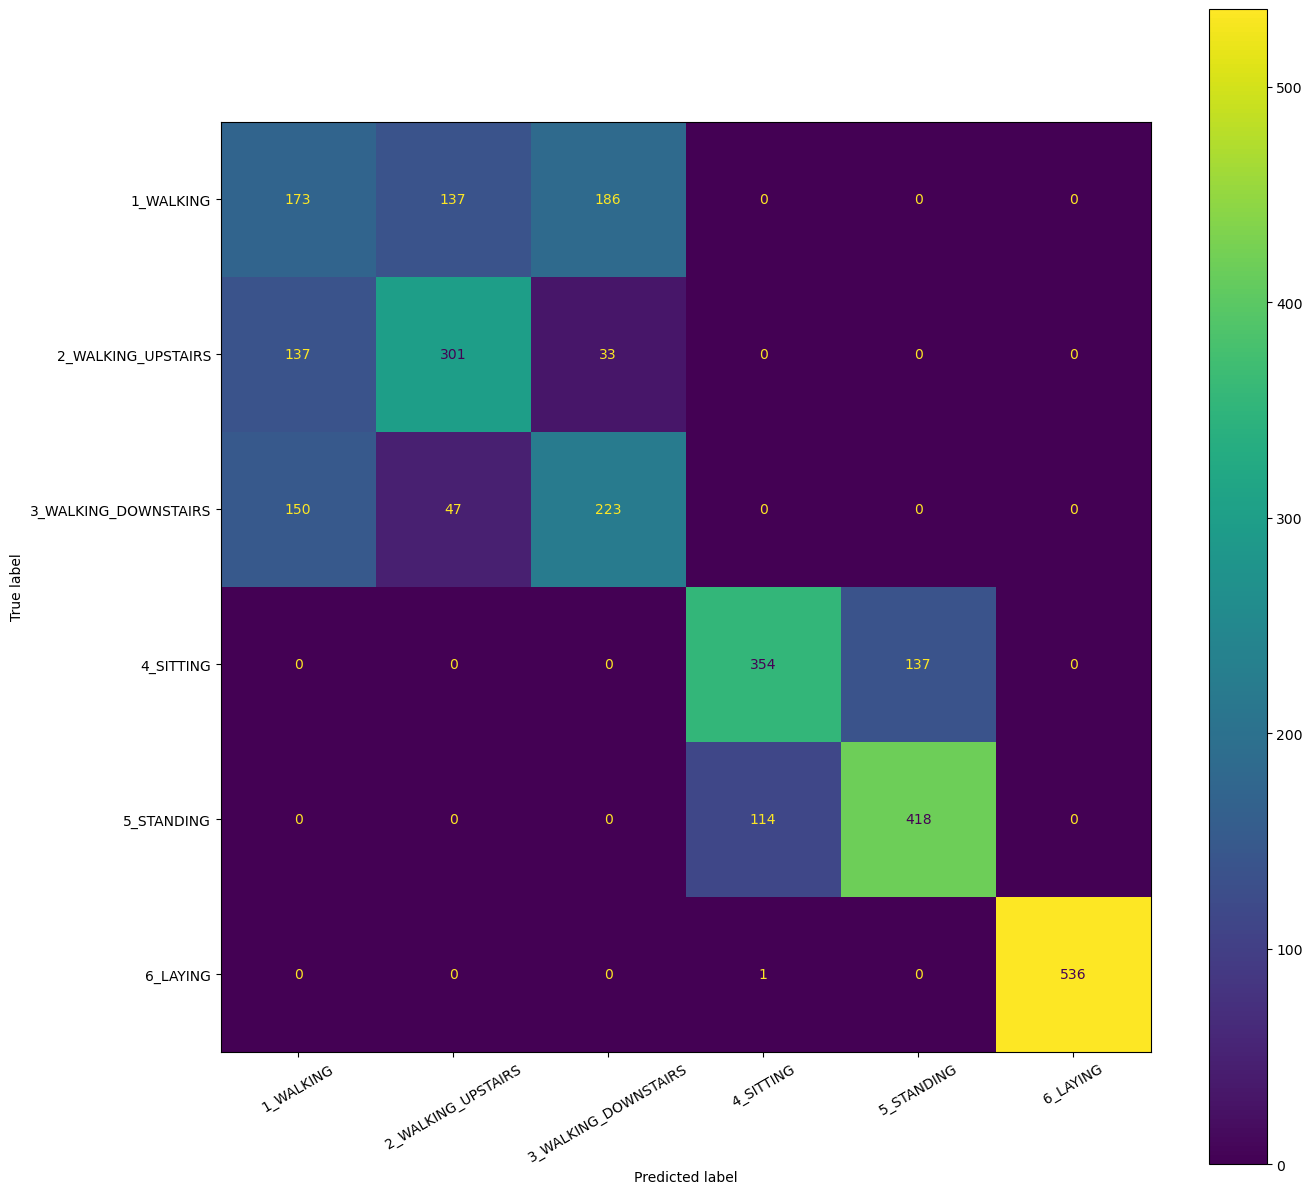

In [ ]:
# Avaliando o Resultado através da Matrix de Confusão.

acuracia_teste = melhor_arvore.score(X_test, y_test)
y_pred = melhor_arvore.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=melhor_arvore.classes_)
print(f'Acurácia: {acuracia_teste*100:.2f}')
plt.rc('figure', figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=melhor_arvore.classes_)
disp.plot(xticks_rotation=30)

plt.show()

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [ ]:
# Calculo do R-quadrado.
R2_train = melhor_arvore.score(X_train, y_train)
R2_valid = melhor_arvore.score(X_valid, y_valid)
R2_test = melhor_arvore.score(X_test, y_test)

# Definindo um template.
template = "O R-quadrado da árvore final com profundidade {0} é: {1:.2f}"

# Imprimindo Resultado.
print(template.format(melhor_arvore.get_depth(), R2_train).replace(".", ",")+" (Treino)")
print(template.format(melhor_arvore.get_depth(), R2_valid).replace(".", ",")+" (Validação)")
print(template.format(melhor_arvore.get_depth(), R2_test).replace(".", ",")+" (Teste)")

NameError: name 'melhor_arvore' is not defined

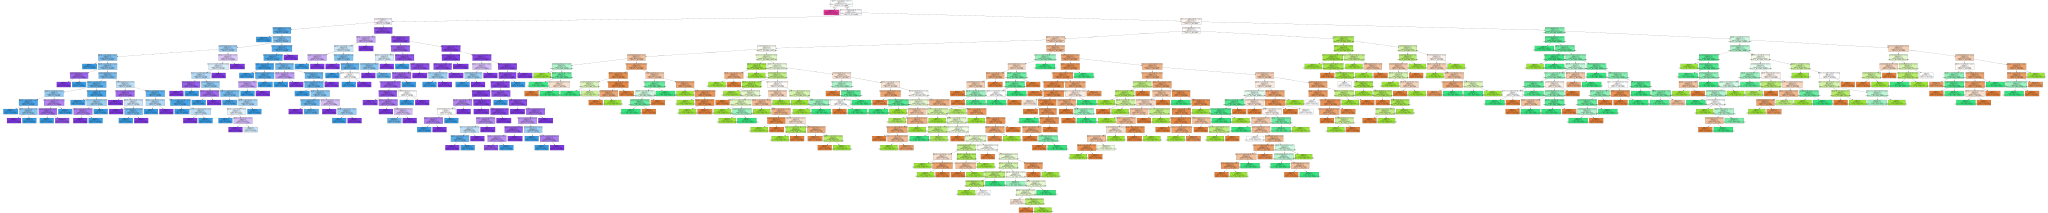

In [ ]:
# DOT data
dot_data = export_graphviz(melhor_arvore, out_file=None, 
                                feature_names=X_test.columns,  
                                class_names=melhor_arvore.classes_,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# Decision Tree Classifier from scikit-learn sklearn visualized with graphviz in Python